# Project 1: Digit Classification with KNN and Naive Bayes

### Alex Smith
### W207 - Intro to Machine Learning

**Some cells take a few minutes to run. However, all cells do eventually complete. P6 takes the longest.**

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB 
# so this cell should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and 
# apply this permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

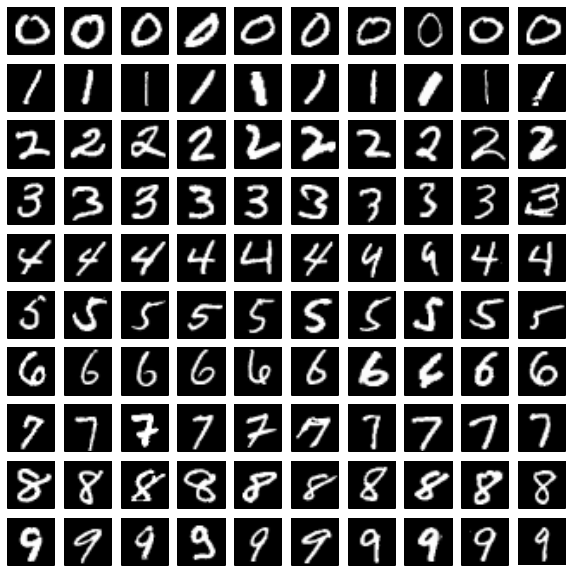

In [3]:
#def P1(num_examples=10):

### STUDENT START ###

# set our constants for plotting the figure sizes
SUB_PLOT_DIM = 10
FIG_SIZE = 10
NUM_EXAMPLES = 10
DIGIT_SIZE = 28

# create a plot holder to draw within and 
# initiliaze the sub-plots
figure, subplots = plt.subplots(SUB_PLOT_DIM, SUB_PLOT_DIM, sharex=True, sharey=True, figsize=(FIG_SIZE,FIG_SIZE))
plt.axis('off')


# loop every digit possible in the training labels
# calculate the maximum training label and add 1 because the range function to 1
# less than the input
for digit in range(int((max(mini_train_labels)+1))):
    
    # initalize a counter to keep track of the occurences of each digit, we 
    # have found so far
    counter = 0
    
    # set a while loop so that we can get 10 examples of each digit
    while counter < NUM_EXAMPLES:        
    
        # loop through all the labels looking for the first ten examples of the digit
        for index, label in enumerate(mini_train_labels):

                # if the label matches the digit we are currently on, plot this sub-plot
                if label == digit:

                    # set the pixels for the digit as a numpy array
                    pixels = np.array(mini_train_data[index])

                    # reshape the pixels to a 28 x 28 grid
                    pixels_reshaped = np.reshape(pixels,(DIGIT_SIZE,DIGIT_SIZE))

                    # turn off the extraneous axes because they add no value and only distraction
                    subplots[int(digit),counter].xaxis.set_visible(False)
                    subplots[int(digit),counter].yaxis.set_visible(False)
                    
                    # show the digit in gray scape using the gray scale color map
                    subplots[int(digit),counter].imshow(pixels_reshaped,cmap=plt.get_cmap('gray'))

                    # increment the counter to move on to the next example of the digit
                    counter = counter + 1
                    
                    # break out of the loop if the counter is 10
                    if counter >= NUM_EXAMPLES:
                        break
                
                # break out of the loop if the counter is 10
                if counter >= NUM_EXAMPLES:
                    break

### STUDENT END ###

#P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [4]:
#def P2(k_values):

### STUDENT START ###

# set the k nearest neighbor models we're interested in testing
k_values = [1,3,5,7,9]

print "Accuracy for K-Nearest Neighbors models with different k values:"

# iterate through each k value we're interested in and create and measure the accuracy
for k in k_values:
    
    # initialize the classifier
    k_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # fit the classifier to the mini training data
    k_classifier.fit(mini_train_data, mini_train_labels)
    
    # predict the development data
    predictions = k_classifier.predict(dev_data)
    
    # compare the predictions to the true labels; taking the mean of the boolean
    # value will give us the average accuracy
    print "k=", k, "| accuracy:", np.mean(predictions == dev_labels)

# print a blank line
print

# initialize a k=1 classifier to test the classification metrics for each digit
k_1_classifier = KNeighborsClassifier(n_neighbors=1)
k_1_classifier.fit(mini_train_data, mini_train_labels)

# set the expected and predicted values
k_1_expected = dev_labels
k_1_predicted = k_1_classifier.predict(dev_data)

# run the classification report
print "Classification for k=1 classifier:"
print classification_report(k_1_expected, k_1_predicted)

print "By the F-scores, the most difficult digit is \"9\"."

### STUDENT END ###

#k_values = [1, 3, 5, 7, 9]
#P2(k_values)

Accuracy for K-Nearest Neighbors models with different k values:
k= 1 | accuracy: 0.888
k= 3 | accuracy: 0.878
k= 5 | accuracy: 0.869
k= 7 | accuracy: 0.865
k= 9 | accuracy: 0.863

Classification for k=1 classifier:
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

By the F-scores, the most difficult digit is "9".


ANSWER:

See answers as output of cell above

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [5]:
#def P3(train_sizes, accuracies):

### STUDENT START ###

# list out the training sizes of interest
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]

# create an array to store the accuracy values for question 4
accuracies =[]

# k-nearest neighbors 
K = 1

# train the k=1 classifier on each of the sizes of training data in the list
for size in train_sizes:
    
    # set the start time
    start_time = time.time()
    
    # create the smaller training data as a subset of the larger set of training data
    # do this for both the labels and the data
    small_train_data = train_data[:size]
    small_train_labels = train_labels[:size]
    
    # initialize the classifier
    k_1_classifier = KNeighborsClassifier(n_neighbors=K)
    
    # fit the classifier with this new, smaller data set
    k_1_classifier.fit(small_train_data, small_train_labels)
    
    # predict the development data
    predictions = k_1_classifier.predict(dev_data)
    
    # calculate the accuracy and append it to the list of accuracies
    accuracy = np.mean(predictions == dev_labels)
    accuracies.append(accuracy)
    
    # set the end time
    end_time = time.time()
    
    # time length
    time_difference = end_time-start_time
    
    # compare the predictions to the true labels; taking the mean of the boolean
    # value will give us the average accuracy
    print "Training set size:", size, "| accuracy:", accuracy, "| time:",time_difference
    

### STUDENT END ###

#train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
#accuracies = []
#P3(train_sizes, accuracies)

Training set size: 100 | accuracy: 0.72 | time: 0.122709989548
Training set size: 200 | accuracy: 0.786 | time: 0.243796110153
Training set size: 400 | accuracy: 0.841 | time: 0.446892976761
Training set size: 800 | accuracy: 0.884 | time: 0.906257867813
Training set size: 1600 | accuracy: 0.902 | time: 1.77404689789
Training set size: 3200 | accuracy: 0.926 | time: 3.60897898674
Training set size: 6400 | accuracy: 0.937 | time: 7.24160599709
Training set size: 12800 | accuracy: 0.959 | time: 14.8874740601
Training set size: 25000 | accuracy: 0.97 | time: 30.8598380089


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [6]:
#def P4():

### STUDENT START ###

# set the constant that we are attempting to predict
PREDICTEE = 60000

# reshape my data using numpy arrays
train_sizes_array = np.array([train_sizes]).T
accuracies_array = np.array([accuracies]).T

# use sklearn's linear regression function to create a linear model 
# based on the training sizes and the outputed accuracies from the
# third question
linear_accuracy = LinearRegression()
linear_accuracy.fit(train_sizes_array, accuracies_array)

# predict the accuracy for n=60000
print "The predicted accuracy for n = 60000 is", linear_accuracy.predict(PREDICTEE)[0][0]

# print the answer to the question: "What's wrong with using regression here?"
print """In this case, the relationship between the accuracy and the training size is not linear. \
Each interval increase in training size does not bring an equal size increase in accuracy. \
Rather, there are diminishing returns. We know this is especially true because the accuracy\
should not exceed 1.0."""

# let's apply a logarithmic transformation to the accuracies to address the problem of the endless increase
def logify(number):
    "returns the log scaled probability of some inputed number"
    
    logified = np.log10(number/(1 - number))
    return logified

# loop through the accuracies and logify them and append the results to
# the newly created accuracies_logified array
accuracies_logified = []
for accuracy in accuracies:
    accuracies_logified.append(logify(accuracy))

# reshape the logified accuracies using numpy
accuracies_logified_array = np.array([accuracies_logified]).T
    
# create a new linear regression model of the logged accuracies
linear_accuracy_logged = LinearRegression()
linear_accuracy_logged.fit(train_sizes_array, accuracies_logified_array)

# predict the logged result for n=60000
log_predicted = linear_accuracy_logged.predict(PREDICTEE)[0][0]

# write a function to de-logify and calculate the actual proportion
def delogify(number):
    "returns the probability after the logged transformation"
    
    delogified = (np.power(10,number) / (1 + np.power(10,number)))
    return delogified

# predict the actual result after delogging
print "\n"
print "The predicted accuracy for n = 60000, after taking the logarithmic transformation, is", delogify(log_predicted)


### STUDENT END ###

#P4()

The predicted accuracy for n = 60000 is 1.24307226036
In this case, the relationship between the accuracy and the training size is not linear. Each interval increase in training size does not bring an equal size increase in accuracy. Rather, there are diminishing returns. We know this is especially true because the accuracyshould not exceed 1.0.


The predicted accuracy for n = 60000, after taking the logarithmic transformation, is 0.998817960328


ANSWER: See above printed answer from code.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

Confusion Matrix
[[ 97   0   4   0   0   1   1   1   0   1]
 [  0 105   6   1   4   0   3   9   6   0]
 [  0   0  82   2   0   0   0   0   0   0]
 [  0   0   1  72   0  13   0   0   7   2]
 [  0   0   0   0  86   0   1   2   0  10]
 [  0   0   0   3   0  75   0   0   2   1]
 [  2   0   0   0   2   1  93   0   1   0]
 [  0   0   7   3   0   0   0  98   0   5]
 [  0   0   2   1   0   0   0   0  74   0]
 [  0   0   0   4  12   1   0   3   6  87]]


Confusion Matrix Portions
[[ 0.924  0.     0.038  0.     0.     0.01   0.01   0.01   0.     0.01 ]
 [ 0.     0.784  0.045  0.007  0.03   0.     0.022  0.067  0.045  0.   ]
 [ 0.     0.     0.976  0.024  0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.011  0.758  0.     0.137  0.     0.     0.074  0.021]
 [ 0.     0.     0.     0.     0.869  0.     0.01   0.02   0.     0.101]
 [ 0.     0.     0.     0.037  0.     0.926  0.     0.     0.025  0.012]
 [ 0.02   0.     0.     0.     0.02   0.01   0.939  0.     0.01   0.   ]
 [ 0.     0. 

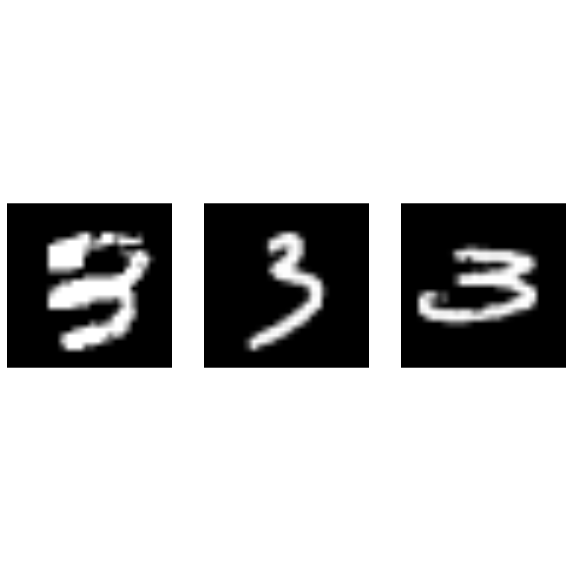

In [7]:
#def P5():

### STUDENT START ###

# initliaze constant for the nubmer of digits
DIGITS_RANGE = range(10)

# create an fit a k=1 nearest neighbor model on the mini-training data
k1classifier = KNeighborsClassifier()
k1classifier.fit(mini_train_data, mini_train_labels)

# predict the development data
k1_predictions = k1classifier.predict(dev_data)
k1_actual = dev_labels

# run the confusion matrix
k1_confusion = confusion_matrix(k1_predictions, k1_actual, labels=DIGITS_RANGE)
print "Confusion Matrix"
print k1_confusion

# the confusion matrix output is each row the digit that should be assigned and
# each column is the digit that is actually predicted

# create a new array to calculate the rates of confusion
k1_confusion_portion = []

# loop through the confusion matrix calculating the portion of each prediction 
# for each digit
for actual_digit in k1_confusion:
    
    # create an array to store the portions for each digit
    digit_portion = []
    
    # loop through each prediction for each digit
    for prediction in actual_digit:
        
        # calculate the portion and append it to the array for the digit portion
        portion = float(prediction) / float(sum(actual_digit))
        digit_portion.append(portion)
    
    # append each digits portions for the confusion portion array
    k1_confusion_portion.append(digit_portion)
    
# convert the portion arrays to a numpy array and round to 3 decimals for readability
k1_confusion_readable = np.array(k1_confusion_portion)
k1_confusion_readable = k1_confusion_readable.round(decimals=3)
print "\n"
print "Confusion Matrix Portions"
print k1_confusion_readable        

# calculate the most confused pair of digits

# create a max confused variable, format: confusion, actual, predicted
max_confused = 0, 0, 0

# look through each actual digit
for index_i, row in enumerate(k1_confusion_readable):
    
    # loop through each predicted value for each digit
    for index_j, column in enumerate(row):
        
        # there is no confusion when the predicted equals the actual,
        # disregard these values
        if index_i <> index_j:
            
            # if the confusion is greater than the stored confusion,
            # then update the confusion value and the indices
            if column > max_confused[0]:
                max_confused = column, index_i, index_j

# print the most confused digit
print "\n"
print "In our k=1 classifier, the digit", max_confused[1], "was most confused with the digit", max_confused[2], "."
print "The portion of", max_confused[1], "confused with", max_confused[2], "was", max_confused[0], "."

# we will show 3 examples of this confusion
EXAMPLES_CONFUSION = range(3)
counter = 0

# create a blank array to show of these confusions
confusion_examples = []

# loop through every prediction and compare it to actual value
for index, prediction in enumerate(k1_predictions):
    # check if the prediction is with the most confused predicted digit
    if prediction == max_confused[2]:

        # check if the actual value is with the most confused actual digit
        if k1_actual[index] == max_confused[1]:

            # append it the array of examples
            confusion_examples.append(dev_data[index])

# print out some examples
print "\n"
print "Examples of Most Confused Digit"

# create 3 subplots
figure, subplots = plt.subplots(1, max(EXAMPLES_CONFUSION)+1, sharex=True, sharey=True, figsize=(FIG_SIZE,FIG_SIZE))
plt.axis('off')

# loop through each of the subplots
for index, subplot in enumerate(subplots):
    
    # set the pixels for the digit as a numpy array
    pixels = np.array(confusion_examples[index])

    # reshape the pixels to a 28 x 28 grid
    pixels_reshaped = np.reshape(pixels,(DIGIT_SIZE,DIGIT_SIZE))

    # turn off the extraneous axes because they add no value and only distraction
    subplot.xaxis.set_visible(False)
    subplot.yaxis.set_visible(False)
    subplot.spines['top'].set_visible(False)
    subplot.spines['right'].set_visible(False)
    subplot.spines['bottom'].set_visible(False)
    subplot.spines['left'].set_visible(False)

    # show the digit in gray scape using the gray scale color map
    subplot.imshow(pixels_reshaped,cmap=plt.get_cmap('gray'))
    

### STUDENT END ###

#P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [8]:
#def P6():

### STUDENT START ###
def GaussianWeight(x, y, sigma = 1.5):
    "function that calculates the weights of neighboring pixels using a 2-D normal distribution"
    
    # calculate the 2 halves of the formula separately for readability
    first_half = 1/(2 * np.power(np.pi,2))
    second_half = np.exp(-(np.power(x,2) + np.power(y,2))/(2 * np.power(sigma,2)))
    
    # bring the two-halves together
    weight = first_half * second_half
    
    return weight

def GaussianBlur(array):
    "function that takes the weights the value of a individual pixel by the 8 neighboring pixels"
    
    # source for Gaussian Blur method:
    # http://www.pixelstech.net/article/1353768112-Gaussian-Blur-Algorithm
    
    # create a new array to hold the blurred values
    blurred = []
    
    # pull each data point in the array
    for digit in array: 
        
        # reshape the digit to be a numpy array using the constansts defined
        # above for the size of the digit
        digit = np.array(digit)
        digit_reshaped = np.reshape(digit,(DIGIT_SIZE,DIGIT_SIZE))
        
        # create an array to hold the blurred digit outcome
        digit_blurred = []
    
        # loop through every row of the array
        for index_i, row in enumerate(digit_reshaped):
            
            # loop through every column of the row of the array
            for index_j, column in enumerate(row):

                # set the coordinates relative to the pixel in question
                # for example, the pixel in question is at (0,0), but the 
                # the pixel just above would be (0,1) because we go up 1
                # but not move horizontally

                # set the coordinates of the pixel and weight
                coor = index_i, index_j, GaussianWeight(0,0)

                # create an array to hold the value of each pixel
                coordinates = []

                # create an array to hold the weights from the Gaussian function
                Gaussian_weights = []

                # create an array to store the relative locations, we hard-code these values
                # as specific to the 8 pixel neighbors
                relative_locations = [[0,1],[-1,1],[1,1],[0,-1],[-1,-1],[1,-1],[-1,0],[1,0]]

                # first add the initial pixel that is being weighted to the first place in the
                # array
                coordinates.append(digit_reshaped[coor[0]][coor[1]])
                Gaussian_weights.append(coor[2])

                # loop through each of the relative locations
                for location in relative_locations:

                    # calculate the new location for the neighboring pixel
                    relative_i = index_i + location[0]
                    relative_j = index_j + location[1]

                    # attempt 2 things: (1) find the neighboring pixel's value and 
                    # (2) find that pixels Gaussian weight
                    try:
                        coordinates.append(digit_reshaped[relative_i][relative_j])
                        Gaussian_weights.append(GaussianWeight(location[0],location[1]))
                    except Exception:
                        pass               

                # calculate the relative Gaussian weights
                # find the sum of the Gaussian weights and create an array to store the relative weights
                relative_weights_sum = sum(Gaussian_weights)
                relative_Gaussian_weights = []

                # loop through each of the weights, recalculating as relative to the other weights
                for weight in Gaussian_weights:
                    relative_Gaussian_weights.append(weight/relative_weights_sum)

                # create a new array to store the relative weights multiplied by the pixel values
                Gaussian_pixels = []

                # multiply the relative Gaussian weights by each pixel value
                for index, weight in enumerate(relative_Gaussian_weights):
                    Gaussian_pixels.append(coordinates[index] * weight)

                # recalculate the new pixel as the sum of all neighboring pixels, appropriately weighted
                new_pixel = sum(Gaussian_pixels)

                # append this new pixel value to blurred array
                digit_blurred.append(new_pixel)
                
        # append the blurred digit to the blurred array
        blurred.append(digit_blurred)
            
    # return the new blurred array
    return blurred
 

# store preprocessed dev and training data
dev_data_pre = GaussianBlur(dev_data)
mini_train_data_pre = GaussianBlur(mini_train_data)

# create an array for storing the label and the accuracy
Gaussian_accuracies = []


    
## preprocess the training data but not the dev data ##

# create and fit a k=1 nearest neighbor model on the blurred mini-training data
k1classifier = KNeighborsClassifier()
k1classifier.fit(mini_train_data_pre, mini_train_labels)

# predict the non-blurred development data
k1_predictions = k1classifier.predict(dev_data)

# calculate the accuracy
k1_accuracy = np.mean(k1_predictions == dev_labels)

# store the accuracy and label as a tuple and append it to the array
result = "just blurred training data", k1_accuracy
Gaussian_accuracies.append(result)

# print the accuracy for this test
print "Accuracy for blurred training data:", result[1]



## preprocess the dev data but not the training data ##

# create and fit a k=1 nearest neighbor model on the non-blurred mini-training data
k1classifier = KNeighborsClassifier()
k1classifier.fit(mini_train_data, mini_train_labels)

# predict the blurred development data
k1_predictions = k1classifier.predict(dev_data_pre)

# calculate the accuracy
k1_accuracy = np.mean(k1_predictions == dev_labels)

# store the accuracy and label as a tuple and append it to the array
result = "just blurred test data", k1_accuracy
Gaussian_accuracies.append(result)

# print the accuracy for this test
print "Accuracy for blurred test data:", result[1]



## preprocess both training and dev data ##

# create and fit a k=1 nearest neighbor model on the blurred mini-training data
k1classifier = KNeighborsClassifier()
k1classifier.fit(mini_train_data_pre, mini_train_labels)

# predict the blurred development data
k1_predictions = k1classifier.predict(dev_data_pre)

# calculate the accuracy
k1_accuracy = np.mean(k1_predictions == dev_labels)

# store the accuracy and label as a tuple and append it to the array
result = "both blurred test and training data", k1_accuracy
Gaussian_accuracies.append(result)

# print the accuracy for this test
print "Accuracy for blurred test and training data:", result[1]



## finish with a concluding statement

# set a max variable and a max_index to 0
max_value = 0
max_index = 0

# loop through the tests
for index, test in enumerate(Gaussian_accuracies):
    
    # compare each value to the to the current max
    if test[1] > max_value:
        max_value = test[1]
        max_index = index

# print the summarizing statement that shows the most accurate test
print "\n"
print "The most accurate test used", Gaussian_accuracies[max_index][0] 
print "The test had an accuracy of", Gaussian_accuracies[max_index][1]
    
### STUDENT END ###

#P6()

Accuracy for blurred training data: 0.9
Accuracy for blurred test data: 0.854
Accuracy for blurred test and training data: 0.899


The most accurate test used just blurred training data
The test had an accuracy of 0.9


ANSWER: See the code output above for comparison of different Gaussian blur accuracies.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [9]:
#def P7():

### STUDENT START ###

## BERNOULLI MODEL ##

# set a constant value, above which everything will be converted to black and below 
# which everything will be converted to white; we set the value less thatn 0.5 because 
# we more want grey's to show as some sort of mark than a blank
THRESHOLD = 0.3

# create an array to store the accuracy and the name of the model
naive_accuracies = []

# initialize a naive bayes classifier using Bernoulli models, binarizing the data to either 0 or 1
naivebayes1 = BernoulliNB(binarize = THRESHOLD)

# fit the model to the mini trainig data
naivebayes1.fit(mini_train_data, mini_train_labels)

# use the model to predict the development data
Bernoulli_predictions = naivebayes1.predict(dev_data)

# calculate the accuracy of the Bernoulli model
Bernoulli_accuracy = np.mean(Bernoulli_predictions == dev_labels)

# create a tuple that holds the name of the model and the accuracy
result_Bernoulli = "Bernoulli model", Bernoulli_accuracy

# append the tuple to our array of accuracies
naive_accuracies.append(result_Bernoulli)

## MULTINOMIAL MODEL ##

# write a function that preprocesses the data so that we 
# can use the multinomial nb function
def mappingNB(array):
    """input is a set of images represeented by an array. loops through each image, represented by sub-array and
    converts each of its pixels to 0, 1, 2 representing white, grey, black"""
    
    # create a new array to hold the resulting images
    mapped_array = []
    
    # loop through each image in the array 
    for sub_array in array: 
        
        # create a new sub-array to hold the pixels for each image
        mapped_sub_array = []
        
        # loop through each pixel in each image
        for pixel in sub_array:
            
            # set the thresholds for color conversion. we leave the largest range for grey because
            # intuitively grey is used to represent a larger color range (e.g. dark grey and 
            # light grey) whereas white and black are often used to represent pure colors
            WHITE_THRESHOLD = 0.25
            GREY_THRESHOLD = 0.75
            
            # set the new pixels based on the thresholds to 0, 1, 2
            if pixel < WHITE_THRESHOLD:
                new_pixel = 0
            elif pixel < GREY_THRESHOLD:
                new_pixel = 1
            else:
                new_pixel = 2
            
            # append the pixel to the new sub-array
            mapped_sub_array.append(new_pixel)
        
        # append the image to our array of images
        mapped_array.append(mapped_sub_array)
        
    # return the completed mapped array
    return mapped_array
                
# initalize a new model using Multinomial models for Naive Bayes
naivebayes2 = MultinomialNB()

# fit the model to a mapped training data
naivebayes2.fit(mappingNB(mini_train_data), mini_train_labels)

# use the model to predict the mapped development data
multinomial_predictions = naivebayes2.predict(mappingNB(dev_data))

# calculate the accuracy of the multinomial model
multinomial_accuracy = np.mean(multinomial_predictions == dev_labels)

# create a tuple that holds the name of the model and the accuracy
result_multinomial = "multinomial model", multinomial_accuracy

# append the tuple to our array of accuracies
naive_accuracies.append(result_multinomial)

# print a comparative tables of accuracies for the two models
print "Comparing Bernoulli and Multinomial Naive Bayes Classification Models"
for model in naive_accuracies:
    print model[0], "| accuracy:", model[1]

# write a summarizing statement that tells us the more accurate model
max_value = 0
max_index = 0
for index, model in enumerate(naive_accuracies):
    if model[1] > max_value:
        max_value = model[1]
        max_index = index

# print the concluding statement
print "\n"
print "The", naive_accuracies[max_index][0], "is the more accurate test, with an accuracy of", \
naive_accuracies[max_index][1]
print "The multiclass version does not improve the results because when writing each pixel is either marked or is \
not marked. When determining a digit, we just need to know the outline. We don't need to know the gradient of values."
### STUDENT END ###

#P7()

Comparing Bernoulli and Multinomial Naive Bayes Classification Models
Bernoulli model | accuracy: 0.818
multinomial model | accuracy: 0.806


The Bernoulli model is the more accurate test, with an accuracy of 0.818
The multiclass version does not improve the results because when writing each pixel is either marked or is not marked. When determining a digit, we just need to know the outline. We don't need to know the gradient of values.


ANSWER: See code output for the answer

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [15]:
#def P8(alphas):

### STUDENT START ###

# initalize a new Bernoulli NB model that is unfitted
Bernoulli = BernoulliNB()

# set the parameters of interests, in this case, we are only interested
# in measuring the difference in accuracies for the Laplace smoothing parameter
parameters = {'alpha':[0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0], 'binarize':[THRESHOLD]}


# set the Gridsearch model using the Bernoulli model and the defined parameters
laplace_search = GridSearchCV(Bernoulli,parameters)

# fit the Gridsearch model on the mini-training data
laplace_search.fit(mini_train_data, mini_train_labels)

# find the best parameter
best_alpha = laplace_search.best_params_

print "The best Laplace smoother is", best_alpha['alpha']

## what is the accuracy when the Laplace smoother is 0 ##

# initialize the model using Laplace smoother of 0 and the same threshold as above
Bernoulli_nosmooth = BernoulliNB(alpha=0, binarize=THRESHOLD)

# fit the model on the mini-training data
Bernoulli_nosmooth.fit(mini_train_data, mini_train_labels)

# predict the dev data
Bernoulli_nosmooth_predictions = Bernoulli_nosmooth.predict(dev_data)

# calculate the accuracy of the no smoothing model
Bernoulli_nosmooth_accuracy = np.mean(Bernoulli_nosmooth_predictions == dev_labels)

# print the accuracy of the no-smoothing model
print '\n'
print "The Bernoulli model with a Laplace smoother of 0 had an accuracy of ", Bernoulli_nosmooth_accuracy
print "While I expected the accuracy to be lower, I did not expect it to be this much lower. However \
this matches well with our understanding of the significance of the Laplace smoother. Without any smoothing, \
we incorrectly assume that events that we have yet to see in our training data never happen. In actuality, we should \
still consider the possibility of these events occurring."

### STUDENT END ###

#alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
#nb = P8(alphas)

The best Laplace smoother is 0.01


The Bernoulli model with a Laplace smoother of 0 had an accuracy of  0.099
While I expected the accuracy to be lower, I did not expect it to be this much lower. However this matches well with our understanding of the significance of the Laplace smoother. Without any smoothing, we incorrectly assume that events that we have yet to see in our training data never happen. In actuality, we should still consider the possibility of these events occurring.


ANSWER: See code output above for answers to the question

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [11]:
#def P9():

### STUDENT END ###

# initalize the Guassian model
naive_Gaussian = GaussianNB()

# fit the model to the mini-training data
naive_Gaussian.fit(mini_train_data, mini_train_labels)

# predict the dev data
naive_Gaussian_predictions = naive_Gaussian.predict(dev_data)

# calculate the accuracy of this Gaussian model
naive_Gaussian_accuracy = np.mean(naive_Gaussian_predictions == dev_labels)

# print the results of our Gaussian Naive Bayes model
print "The Guassian Naive Bayes model does not do a good job of modeling the data. It produces an accuracy \
of only", naive_Gaussian_accuracy

# I attempted refit the model on blurred data using the Gaussian blur function from P6. However, 
# blurring the data resulted in lower accuracy

# smooth out sigma to improve the model
SIGMA_ADJUST = 99999999999999
SIGMA_ADJUST_ADD = 1
naive_Gaussian.sigma_ = (naive_Gaussian.sigma_/SIGMA_ADJUST) + SIGMA_ADJUST_ADD

# predict the dev data again
naive_Gaussian_predictions2 = naive_Gaussian.predict(dev_data)

# calculate the accuracy of this Gaussian model, again
naive_Gaussian_accuracy2 = np.mean(naive_Gaussian_predictions2 == dev_labels)

# print the results of our Gaussian Naive Bayes model
print "The Guassian Naive Bayes model with a modified signma produces an accuracy of ", naive_Gaussian_accuracy2

# calculate some comparison statistics so what can show how close our new model is to the Bernoulli model
# remember that we calculated the accuracy of the Bernoulli model in P7, with the variable Bernoulli_accuracy
difference1 = (Bernoulli_accuracy - naive_Gaussian_accuracy) * 100
difference2 = (Bernoulli_accuracy - naive_Gaussian_accuracy2) * 100

# print a summarizing statement
print "\n"
print "We have significantly improved the accuracy of the model. Sigma is the variance of each feature for \
each class. By reducing sigma basically to zero and then adding 1, we reduced the variance and constructed a \
model more similar to the binary data of the Bernoulli model. The accuracy of the Bernoulli model is %0.0f percent. \
The Bernoulli model has a %0.0f percentage point advantage over our first Gaussian model. However, when we adjust \
the sigma on our Gaussian model, we drop that percentage advantage to a mere %0.0f percentage points." \
%(Bernoulli_accuracy*100, difference1, difference2)

### STUDENT END ###

#gnb = P9()

The Guassian Naive Bayes model does not do a good job of modeling the data. It produces an accuracy of only 0.621
The Guassian Naive Bayes model with a modified signma produces an accuracy of  0.802


We have significantly improved the accuracy of the model. Sigma is the variance of each feature for each class. By reducing sigma basically to zero and then adding 1, we reduced the variance and constructed a model more similar to the binary data of the Bernoulli model. The accuracy of the Bernoulli model is 82 percent. The Bernoulli model has a 20 percentage point advantage over our first Gaussian model. However, when we adjust the sigma on our Gaussian model, we drop that percentage advantage to a mere 2 percentage points.


ANSWER: See code output above for answers.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

The generated numbers are a little more grainy than the actual training numbers. This is because we used a
probability distribution when generating these numbers. This meant that there was always a chance that any given
pixel was white or black (even if the chance was tiny). In the actual training data, the strokes are more filled
in because the person drawing digit does not really skip a pixel.


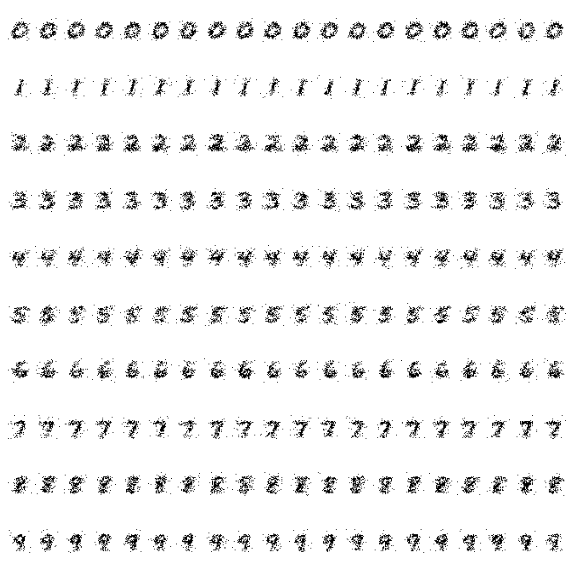

In [12]:
#def P10(num_examples):

### STUDENT START ###

# initalize a Bernoulli model and train it on the mini-training data
generative_Bernoulli = BernoulliNB(binarize = THRESHOLD)
generative_Bernoulli.fit(mini_train_data, mini_train_labels)

# generate a array of sub-plots (10 x 20) to hold 20 examples for each digit
# set our constants for plotting the figure sizes
SUB_PLOT_DIM_1 = 10
SUB_PLOT_DIM_2 = 20
FIG_SIZE = 10
NUM_EXAMPLES = 20
DIGITS = 10
DIGIT_SIZE = 28

# initiliaze the sub-plots
figure, subplots = plt.subplots(SUB_PLOT_DIM_1, SUB_PLOT_DIM_2, sharex=True, sharey=True, figsize=(FIG_SIZE,FIG_SIZE))
plt.axis('off')

# loop through each digit generating 20 examples
for digit in range(DIGITS):
    
    # loop through each of the 20 possible examples
    for example in range(NUM_EXAMPLES):
        
        # create an array to hold each example
        example_digit = []
        
        # loop through each pixel in each example
        for index, pixel in enumerate(range(DIGIT_SIZE*DIGIT_SIZE)):
            
            # grab the log probability for the pixel
            log_probability = generative_Bernoulli.feature_log_prob_[digit][index]
            
            # convert the log probability to the actual pixel probability
            pixel_probability = np.exp(log_probability)
            
            # generate a random number between 0 and 1
            pixel_random = np.random.random_sample()
            
            # if random number is less than the probability, assign the pixle to white or zero
            # else assign the pixel to 1 or black
            if pixel_random < pixel_probability:
                new_pixel = 0
            else:
                new_pixel = 1
                
            # append the new pixel to the example digit array
            example_digit.append(new_pixel)
            
        # convert the example digit to a numpy array
        pixels = np.array(example_digit)

        # reshape the pixels to a 28 x 28 grid
        pixels_reshaped = np.reshape(pixels,(DIGIT_SIZE,DIGIT_SIZE))

        # turn off the extraneous axes because they add no value and only distraction
        subplots[digit,example].xaxis.set_visible(False)
        subplots[digit,example].yaxis.set_visible(False)
        # turn off the extraneous axes because they add no value and only distraction
        subplots[digit,example].xaxis.set_visible(False)
        subplots[digit,example].yaxis.set_visible(False)
        subplots[digit,example].spines['top'].set_visible(False)
        subplots[digit,example].spines['right'].set_visible(False)
        subplots[digit,example].spines['bottom'].set_visible(False)
        subplots[digit,example].spines['left'].set_visible(False)

        # show the digit in gray scape using the gray scale color map
        subplots[digit,example].imshow(pixels_reshaped,cmap=plt.get_cmap('gray'))

# print a concluding statement comparing the generated numbers to the training numbers
print """The generated numbers are a little more grainy than the actual training numbers. This is because we used a
probability distribution when generating these numbers. This meant that there was always a chance that any given
pixel was white or black (even if the chance was tiny). In the actual training data, the strokes are more filled
in because the person drawing digit does not really skip a pixel."""


### STUDENT END ###

#P10(20)

ANSWER: see above code output for answer.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [13]:
#def P11(buckets, correct, total):
    
### STUDENT START ###

# train a Bernoulli Naive Bayes classifier on the mini-training data
# use a Laplace smoother of 0.01 because that is what we found as the best smoother
# in question 8
ALPHA = 0.01
BernoulliNB2 = BernoulliNB(alpha=ALPHA, binarize=THRESHOLD)
BernoulliNB2.fit(mini_train_data, mini_train_labels)

# define the buckets of posterior probability
buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]

# create an array to hold the counts of correct and total for each bucket
bucket_results = []

# initiliaze the arrays for correct and total for each bucket to zero
# the first value will be for corrects and the second for totals
for bucket in range(len(buckets)):
    bucket_array = [0,0]
    bucket_results.append(bucket_array)

# loop through each example in the dev data set
for index_i, digit in enumerate(dev_data):
    
    # reshape the digit as a numpy array so that it is readable by our model
    digit_reshaped = np.array(digit).reshape(1,-1)
    
    # predict the digit
    digit_prediction = BernoulliNB2.predict(digit_reshaped)

    # get the actual digit
    digit_actual = dev_labels[index_i]
    
    # get the posterior probability
    posterior = BernoulliNB2.predict_proba(digit_reshaped)[0,int(digit_prediction)]
    
    # loop through the buckets
    for index_j, bucket in enumerate(buckets):
        
        # set an update value to allow us to break out of this for loop
        # once we have incremented the appropriate bucket
        update = False
        
        # if the probability is less than the bucket value
        if posterior <= bucket:
            
            # pull the current counts from the bucket results
            current = bucket_results[index_j]
            
            # increment the total value
            new_total = current[1] + 1
            
            # check if we got it correct and increment new correct if so
            if digit_prediction == digit_actual:
                new_correct = current[0] + 1
            
            # if we didn't get it correct, then new_correct makes no 
            # adjustments to the correct number
            else: 
                new_correct = current[0]
                
            # update the bucket results with what we've found
            bucket_results[index_j] = [new_correct, new_total]
            
            # change the update value to true since we've updated the bucket
            update = True
            
        # if we've updated the buckets breakout of the for loop
        if update == True:
            break

# calculate the accuracies for each bucket
# create an empty array to hold the accuracies for each bucket
bucket_accuracies = []

# loop through each of the bucket results
for bucket in bucket_results:
    
    # get the accuracy as the portion of correct to total and append to our new array
    bucket_accuracies.append(float(bucket[0])/float(bucket[1]))

# print out the results for each bucket
print "Accuracy for posterior probabilities"
for index, accuracy in enumerate(bucket_accuracies):
    print "Posterior probability <= %0.13f : %0.4f" %(buckets[index], accuracy) 

# write a summarizing statement
print "\n"
print """Based on the results from looking at the posetrior probabilities, I would say that the classifier is
weakly callibrated. When the posterior probability is at 0.9, the accuracy is significantly less than 90%. 
However, the accuracy does increase as the posterior probability increases."""

                
### STUDENT END ###

#buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
#correct = [0 for i in buckets]
#total = [0 for i in buckets]

#P11(buckets, correct, total)

#for i in range(len(buckets)):
#    accuracy = 0.0
#    if (total[i] > 0): accuracy = correct[i] / total[i]
#    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

Accuracy for posterior probabilities
Posterior probability <= 0.5000000000000 : 0.5000
Posterior probability <= 0.9000000000000 : 0.3415
Posterior probability <= 0.9990000000000 : 0.4000
Posterior probability <= 0.9999900000000 : 0.6667
Posterior probability <= 0.9999999000000 : 0.6034
Posterior probability <= 0.9999999990000 : 0.7097
Posterior probability <= 0.9999999999900 : 0.8333
Posterior probability <= 0.9999999999999 : 0.8387
Posterior probability <= 1.0000000000000 : 0.9617


Based on the results from looking at the posetrior probabilities, I would say that the classifier is
weakly callibrated. When the posterior probability is at 0.9, the accuracy is significantly less than 90%. 
However, the accuracy does increase as the posterior probability increases.


ANSWER: See code output for all answers.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [14]:
#def P12():

### STUDENT START ###

# constants for the images
DIGIT_SIZE = 28

# try summing the pixel values in each row and each column
def simplify(array_of_arrays):
    "takes an array and simplifies it to an array that represents the sums of the rows and columns"
    
    # create a new array_of_arrays to hold the results from the simplify function
    new_array_of_arrays = []
    
    # loop through the array_of_arrays, pulling each digit
    for digit in array_of_arrays:
        
        # counters for testing
        rows = 0
        columns = 0
        
        # create arrays to hold the final result, the sum of the columns, and the sum of the rows
        revised_pixel = []
        
        # reshape each digit as a numpy array with columns and rows
        digit_reshaped = np.array(digit)
        digit_reshaped = np.reshape(digit_reshaped,(DIGIT_SIZE,DIGIT_SIZE))
        
        # sum across each row
        for row in digit_reshaped:
            revised_pixel.append(sum(row))
            
        # sum across each column by transporsing the array
        for column in digit_reshaped.T:
            revised_pixel.append(sum(column))
        
        # append this new list to the new_array_of_arrays
        new_array_of_arrays.append(revised_pixel)
    
    # return the revised array
    return new_array_of_arrays

# perform the simplify function on our training and testing data
train_simplified = simplify(mini_train_data)
dev_simplified = simplify(dev_data)

# create and fit a Naive-Bayes classifier (we'll use GaussianNB) on the data
# at first we'll use the regular data to get a comparative baseline
GaussianNB_extra = GaussianNB()
GaussianNB_extra.fit(mini_train_data, mini_train_labels)

# use the model to predict the dev data and calculate the accuracy of the model
predictions1 = GaussianNB_extra.predict(dev_data)
accuracy1 = np.mean(predictions1 == dev_labels)
print "Accuracy for the Naive Bayes model without adjustments is", accuracy1

# refit the model to the simplified training data
GaussianNB_extra.fit(train_simplified, mini_train_labels)

# use the model to predict the simplified dev data and calculate the accuracy of the model
predictions2 = GaussianNB_extra.predict(dev_simplified)
accuracy2 = np.mean(predictions2 == dev_labels)
print "Accuracy for the Naive Bayes model without adjustments is", accuracy2

print "\nSubmitting for partial credit"

### STUDENT END ###

#P12()

Accuracy for the Naive Bayes model without adjustments is 0.621
Accuracy for the Naive Bayes model without adjustments is 0.554

Submitting for partial credit
